In [ ]:
from UQpy.StochasticProcess import BSRM
from UQpy.RunModel import RunModel
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
plt.style.use('seaborn')

The input parameters necessary for the generation of the stochastic processes are given below:

In [2]:
n_sim = 10  # Num of samples

n = 1 # Num of dimensions

# Input parameters
T = 600  # Time(1 / T = dw)
nt = 12000  # Num.of Discretized Time
F = 1 / T * nt / 2  # Frequency.(Hz)
nf = 6000  # Num of Discretized Freq.

# # Generation of Input Data(Stationary)
dt = T / nt
t = np.linspace(0, T - dt, nt)
df = F / nf
f = np.linspace(0, F - df, nf)

Defining the Power Spectral Density($S$)

In [3]:
S = 32 * 1 / np.sqrt(2 * np.pi) * np.exp(-1 / 2 * f ** 2)

# Generating the 2 dimensional mesh grid
fx = f
fy = f
Fx, Fy = np.meshgrid(f, f)

b = 95 * 2 * 1 / (2 * np.pi) * np.exp(2 * (-1 / 2 * (Fx ** 2 + Fy ** 2)))
B_Real = b
B_Imag = b

B_Real[0, :] = 0
B_Real[:, 0] = 0
B_Imag[0, :] = 0
B_Imag[:, 0] = 0

Defining the Bispectral Density($B$)

In [4]:
B_Complex = B_Real + 1j * B_Imag
B_Ampl = np.absolute(B_Complex)

Make sure that the input parameters are in order to prevent aliasing

In [5]:
t_u = 2*np.pi/2/F

if dt>t_u:
    print('Error')

In [6]:
BSRM_object = BSRM(n_sim, S, B_Complex, dt, df, nt, nf)
samples = BSRM_object.samples

KeyboardInterrupt: 

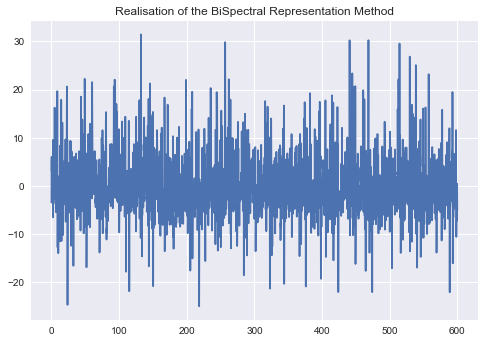

In [ ]:
fig, ax = plt.subplots()
plt.title('Realisation of the BiSpectral Representation Method')
plt.plot(t, samples[0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [43]:
print('The mean of the samples is ', np.mean(samples), 'whereas the expected mean is 0.000')
print('The variance of the samples is ', np.var(samples), 'whereas the expected variance is ', np.sum(S)*df*2)
print('The skewness of the samples is ', np.mean(skew(samples, axis=0)), 'whereas the expected skewness is ', np.sum(B_Real)*df**2*6/(np.sum(S)*df*2)**(3/2))

The mean of the samples is  0.00969425473754 whereas the expected mean is 0.000
The variance of the samples is  32.1408879391 whereas the expected variance is  32.0212769216
The skewness of the samples is  0.725660081057 whereas the expected skewness is  0.784945966965


In [ ]:
import time

t = time.time()
z = RunModel(cpu=4, model_type=None, model_script='UQpy_Model.sh', input_script='UQpy_Input.sh', 
         output_script='UQpy_Output.sh', samples=BSRM_object.samples, dimension=2)
t_run = time.time()-t
print(t_run)